In [1]:
import spacy
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import random
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from gensim.models import Word2Vec
from spacy.training import Example
import json
from spacy import displacy

In [2]:
data = pd.read_csv("data/data1.csv")
data["Resume"] = data["Resume"].astype(str)
data

Category                                             Resume
0          Data Science  Skills * Programming Languages: Python (pandas...
1          Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2          Data Science  Areas of Interest Deep Learning, Control Syste...
3          Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4          Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
...                 ...                                                ...
11019  DotNet Developer  Technical Skills â¢ Languages: C#, ASP .NET M...
11020  DotNet Developer  Education Details \r\nJanuary 2014  Education ...
11021  DotNet Developer  Technologies ASP.NET, MVC 3.0/4.0/5.0, Unit Te...
11022  DotNet Developer  Technical Skills CATEGORY SKILLS Language C, C...
11023  DotNet Developer  TECHNICAL SKILLS â Programming Languages: C#...

[11024 rows x 2 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11024 entries, 0 to 11023
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  11024 non-null  object
 1   Resume    11024 non-null  object
dtypes: object(2)
memory usage: 172.4+ KB


In [4]:
data.describe()

Category                                             Resume
count     11024                                              11024
unique       25                                                166
top     Testing  Skills VISA B1-VISA (USA) Onsite Visits to Swe...
freq       1120                                                204

In [5]:
null_values = data.isnull().sum()
print("Nombre de valeurs nulles par colonne :")
print(null_values)

Nombre de valeurs nulles par colonne :
Category    0
Resume      0
dtype: int64


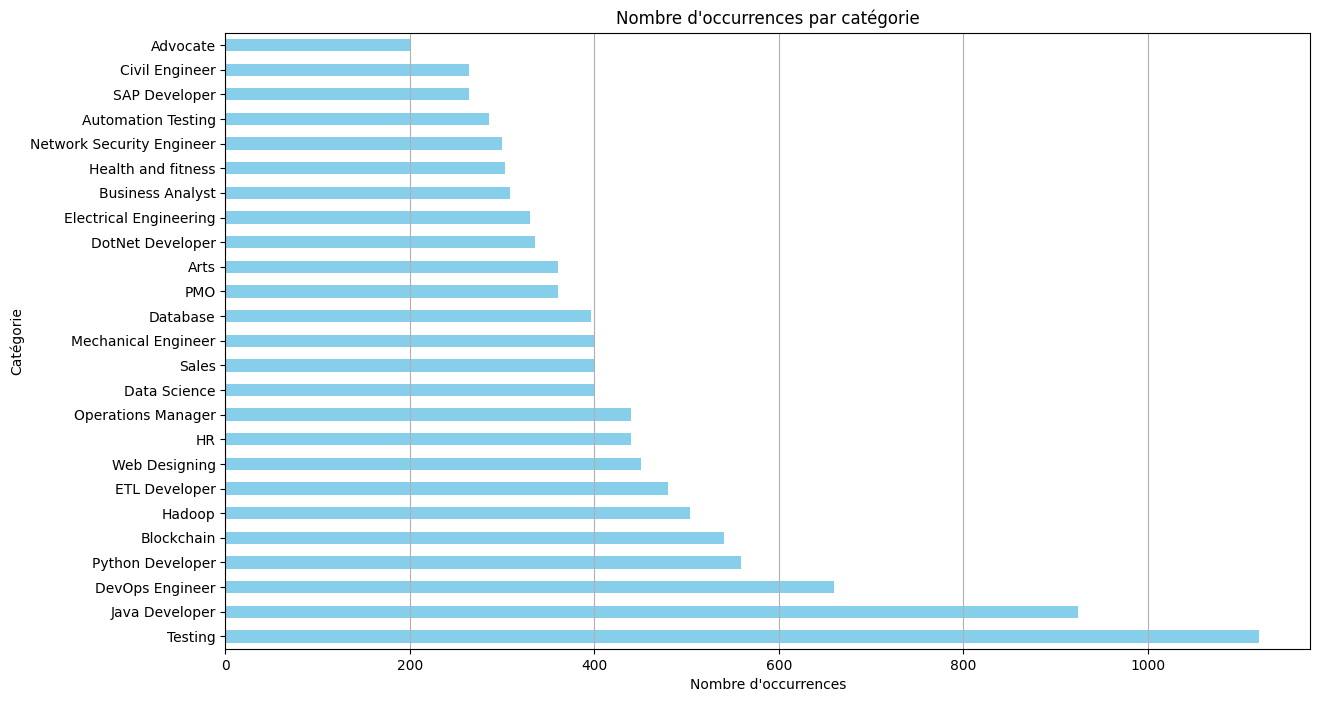

In [6]:
resume_counts = data['Category'].value_counts()
plt.figure(figsize=(14, 8))
resume_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Nombre d\'occurrences')
plt.ylabel('Catégorie')
plt.title('Nombre d\'occurrences par catégorie')
plt.grid(axis='x')
plt.show()

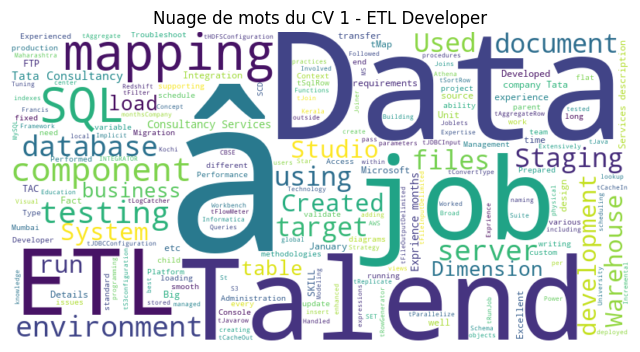

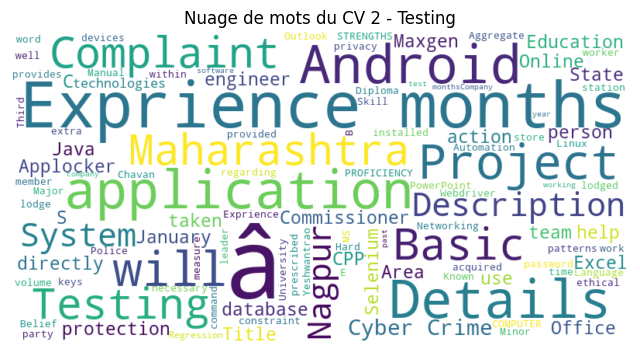

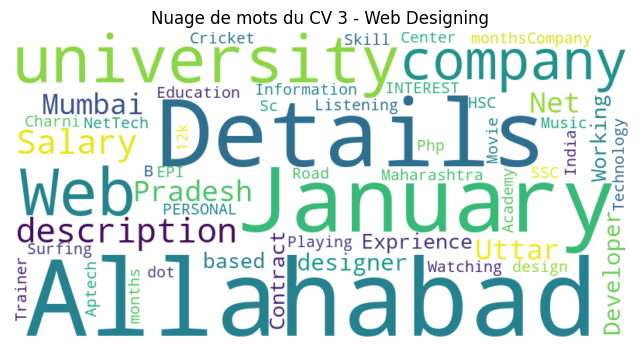

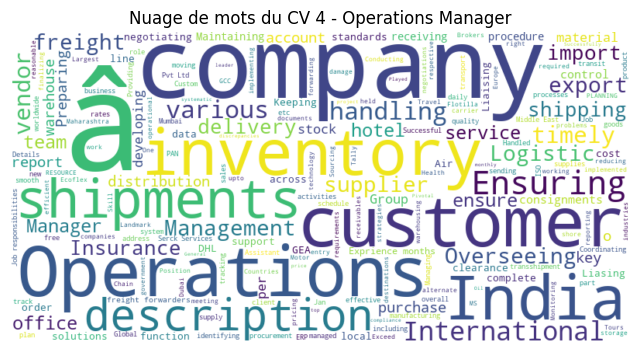

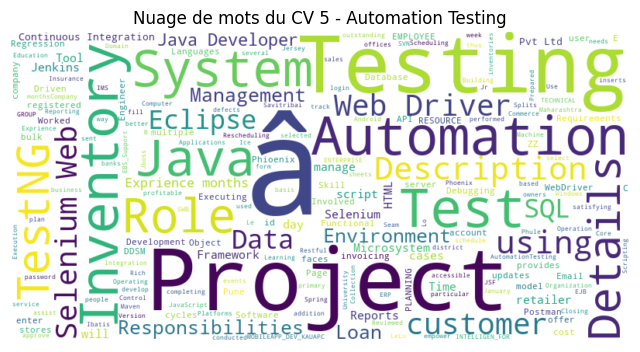

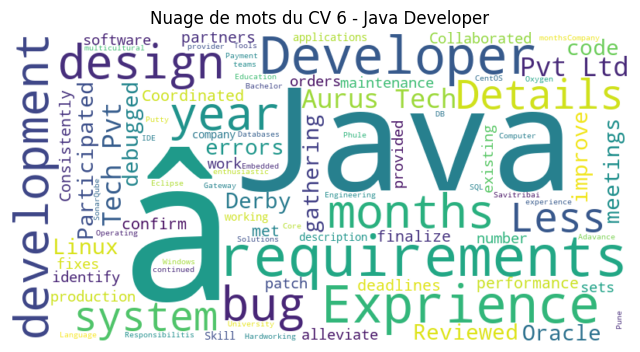

In [7]:
def afficher_cv_aleatoires(data, nombre_cv):
    indices_aleatoires = random.sample(range(len(data)), nombre_cv)
    for i, idx in enumerate(indices_aleatoires):
        resume_text = data.iloc[idx]['Resume']
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(resume_text)
        plt.figure(figsize=(8, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Nuage de mots du CV {i+1} - {data.iloc[idx]["Category"]}')
        plt.show()
afficher_cv_aleatoires(data, 6)

In [8]:
# sp = spacy.load('en_core_web_sm')

### Stop Word Removal :

In [9]:
import nltk
from nltk.corpus import stopwords

# Téléchargez la liste des mots vides pour la langue anglaise
nltk.download('stopwords')

# Chargez la liste des mots vides pour l'anglais
stop_words = set(stopwords.words('english'))

# Affichez les mots vides
print(stop_words)


{'ourselves', 'll', 'very', 'hers', 'don', 'down', 'to', 'about', "don't", 'aren', 'being', "wasn't", "wouldn't", 'o', 'who', 'were', 'as', 'its', 'below', 'theirs', 'for', 'am', 'all', 'couldn', 'from', 'through', 'hasn', 'no', 'an', 'out', 'why', 'your', 'under', 'than', 'before', 'wouldn', "should've", 'their', 'other', 'mightn', "shan't", 'which', 'those', "hadn't", 'here', 'only', 'the', 'during', 'and', 'didn', 'my', 'haven', 'they', 'him', "weren't", 'been', 'this', 'if', 'wasn', "isn't", 'we', "you're", 'hadn', 'because', 't', 'against', 'further', 'won', 'but', 'itself', 'his', 'did', 'themselves', 'again', 'have', 'there', 'ours', 'them', 'weren', 'isn', 'while', "couldn't", 'once', 'most', 'how', 'that', 'ma', 'above', 'should', 'her', 'yourself', 'each', "needn't", 're', 'doing', "didn't", 'both', 'own', 'until', "shouldn't", 'be', "haven't", "you'd", 'is', 'then', 'will', 'by', "hasn't", 'has', "she's", 'in', 'just', 'was', 'of', 'at', 'yourselves', 'so', "that'll", 'or', 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tallo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
import nltk
from nltk.corpus import stopwords

# Téléchargez la liste des mots vides pour la langue française
nltk.download('stopwords')
nltk.download('punkt')  # Vous aurez également besoin de télécharger les données pour la tokenization

# Chargez la liste des mots vides pour le français
stop_words = set(stopwords.words('french'))

# Affichez les mots vides
print(stop_words)


{'mon', 'ce', 'étée', 'aurait', 'te', 'votre', 'as', 'soit', 'eussiez', 'été', 'serions', 'vous', 'avait', 'qu', 'eusses', 'le', 'l', 'nous', 'étante', 'mes', 'aies', 'j', 'étants', 'serez', 'les', 'aura', 'avaient', 'soyons', 'ayant', 'soyez', 'aux', 'ses', 'dans', 'serai', 'ayantes', 'auriez', 'eurent', 'est', 'eues', 'un', 'moi', 'en', 'pas', 'à', 'étiez', 'ayants', 'eût', 'fussent', 'sommes', 'vos', 'avions', 'es', 'pour', 'suis', 't', 'étés', 'fusses', 'je', 'fussions', 'il', 'n', 'fut', 'avais', 'seront', 'était', 'étions', 'êtes', 'aurai', 'la', 'avez', 'ne', 'une', 'eûmes', 'fussiez', 'ma', 'seraient', 'fûmes', 'soient', 'de', 'sera', 'avec', 'serons', 'sois', 'même', 'son', 'aurions', 'eusse', 'sur', 'ils', 'qui', 'sont', 'auront', 'eûtes', 'seriez', 'eut', 'étantes', 'étées', 'eux', 'tes', 'aurais', 'fûtes', 'tu', 'auras', 'elle', 'c', 'seras', 'ont', 'aurez', 'se', 'étant', 'ayante', 'étais', 'furent', 'fus', 'aie', 'par', 'toi', 'eussent', 'ayons', 'serais', 'avons', 'notre

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tallo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tallo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
import nltk
from nltk.corpus import stopwords

# Téléchargez la liste des mots vides pour la langue française
nltk.download('stopwords')
nltk.download('punkt')  # Vous aurez également besoin de télécharger les données pour la tokenization

# Chargez la liste des mots vides pour le français
stop_words = set(stopwords.words('arabic'))

# Affichez les mots vides
print(stop_words)


{'تفعلان', 'عيانا', 'لا سيما', 'أربعة', 'ثمّة', 'ألف', 'لستما', 'ليت', 'اتخذ', 'صبرا', 'الألاء', 'أبٌ', 'أوشك', 'خلف', 'ثمانمئة', 'ما برح', 'تلكم', 'عشرين', 'ذينك', 'مليم', 'هَاتَيْنِ', 'ثمّ', 'عَدَسْ', 'أنتن', 'تانِ', 'تانِك', 'سبحان', 'بهما', 'جيم', 'هَاتِي', 'ساء', 'على', 'مئة', 'عدَّ', 'تي', 'ته', 'عجبا', 'آها', 'كاف', 'كيفما', 'تاء', 'منها', 'آهِ', 'راح', 'لهم', 'أنشأ', 'كاد', 'الألى', 'اللتين', 'ذواتي', 'ثلاثمائة', 'ليستا', 'كلّما', 'بي', 'ها', 'حمٌ', 'تسعة', 'وما', 'أيار', 'يناير', 'أحد', 'هذين', 'غين', 'وا', 'ارتدّ', 'أنتما', 'تَيْنِ', 'ثامن', 'أفعل به', 'ثمنمئة', 'بنا', 'سحقا', 'كان', 'أفٍّ', 'وُشْكَانَ', 'مائة', 'ى', 'آذار', 'حَذارِ', 'إلَيْكَ', 'ض', 'بعض', 'بسّ', 'بطآن', 'ثلاثون', 'هبّ', 'صهٍ', 'سبعمائة', 'بكن', 'أنا', 'اربعين', 'شرع', 'ليسا', 'إياكن', 'جانفي', 'نَّ', 'بهن', 'راء', 'جعل', 'كلا', 'جميع', 'جوان', 'خميس', 'وإن', 'أعلم', 'كيف', 'ثمة', 'عدا', 'عند', 'نون', 'قلما', 'هَجْ', 'غدا', 'ليس', 'ذان', 'لاسيما', 'إي', 'التي', 'نبَّا', 'ذيت', 'ذا', 'بل', 'سنتيم', 'آه', 'أكت

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tallo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tallo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## tokinization

La tokenization est le processus de découpage d'une chaîne de texte en unités discrètes appelées "tokens". Ces tokens peuvent être des mots, des phrases ou même des symboles, selon le niveau de granularité souhaité

In [12]:
from nltk.tokenize import word_tokenize

text = "La tokenization est un processus important en traitement de texte."
tokens = word_tokenize(text)

print(tokens)


['La', 'tokenization', 'est', 'un', 'processus', 'important', 'en', 'traitement', 'de', 'texte', '.']


## Stemming :

Le stemming est le processus de réduction des mots à leur racine ou à leur forme de base, en supprimant les suffixes et les préfixes. Cela permet de regrouper les mots apparentés sous une forme commune.

In [13]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
words = ["running", "ran", "runs"]

stemmed_words = [stemmer.stem(word) for word in words]

print(stemmed_words)


['run', 'ran', 'run']


## Lemmatisation 

La lemmatisation est similaire au stemming mais elle tient compte de la morphologie des mots et les réduit à leur forme canonique ou lemmes. Contrairement au stemming, la lemmatisation donne des mots réels et significatifs.

In [14]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
words = ["cats", "running", "better", "ate", "rocks"]

lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

print(lemmatized_words)


['cat', 'running', 'better', 'ate', 'rock']


In [15]:
lemmatizer = WordNetLemmatizer()
def clean_resume(resume):
    tokens = word_tokenize(resume.lower())
    tokens = [token for token in tokens if token.isalpha() and token not in string.punctuation and token not in stopwords.words('english')]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)
data["Resume"] = data["Resume"].apply(clean_resume)

In [16]:
data

Category                                             Resume
0          Data Science  skill programming language python panda numpy ...
1          Data Science  education detail may may data scientist data s...
2          Data Science  area interest deep learning control system des...
3          Data Science  skill r python sap hana tableau sap hana sql s...
4          Data Science  education detail mca ymcaust faridabad haryana...
...                 ...                                                ...
11019  DotNet Developer  technical skill language c asp mvc html cs jav...
11020  DotNet Developer  education detail january education detail pune...
11021  DotNet Developer  technology mvc unit testing entity framework l...
11022  DotNet Developer  technical skill category skill language c c oo...
11023  DotNet Developer  technical skill programming language c web tec...

[11024 rows x 2 columns]

In [17]:
sentences = data["Resume"].tolist()
sentences

['skill programming language python panda numpy scipy matplotlib sql java machine learning regression svm bayes knn random forest decision tree boosting technique cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural net database visualization mysql sqlserver cassandra hbase elasticsearch plotly kibana matplotlib ggplot tableau others regular expression html cs angular logstash kafka python flask git docker computer vision open cv understanding deep detail data science assurance associate data science assurance associate ernst young llp skill detail exprience month exprience month exprience monthscompany detail company ernst young llp description fraud investigation dispute service assurance technology assisted review tar technology assisted review assist accelerating review process run analytics generate report core member team helped developing automated review platform tool scratch assisting e disco

# WordEmbedding

<div style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333;">
    <p><span style="font-weight: bold; color: blue;">Word2Vec </span>trouve des similitudes entre les mots en utilisant la métrique de similarité cosinus. Si l’angle cosinus est de 1, cela signifie que les mots se chevauchent. Si l’angle cosinus est de 90, cela signifie que les mots sont indépendants ou n’ont aucune similitude contextuelle. Il attribue des représentations vectorielles similaires à des mots similaires.


<div style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333;">
    <p style="color :red"> La similarité cosinus</p>
    mesure la proximité entre deux vecteurs dans un espace vectoriel en évaluant le 
    cosinus de l'angle entre eux. Elle varie de -1 à 1 : 1 indique une parfaite similarité, -1 une parfaite 
    dissimilarité, et 0 une absence de corrélation linéaire. Ainsi, les intervalles de similarité sont [-1, 1].

In [133]:
from IPython.display import display, HTML

# Chemin vers l'image que vous voulez afficher
chemin_image = "data/images/imgw.png"

# Largeur et hauteur souhaitées
width = 800
height = 300

# Code HTML pour centrer l'image
html_code = f"""
<div style="text-align: center;">
    <img src="{chemin_image}" alt="Image" width="{width}" height="{height}">
</div>
"""

# Afficher l'image centrée
display(HTML(html_code))


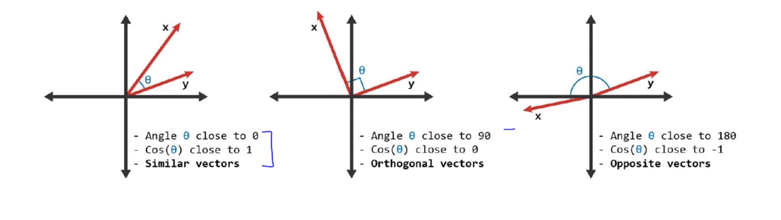

In [18]:
from IPython.display import display, Image

# Chemin de l'image
image_path = 'data/images/1.png'
# Afficher l'image
display(Image(filename=image_path))


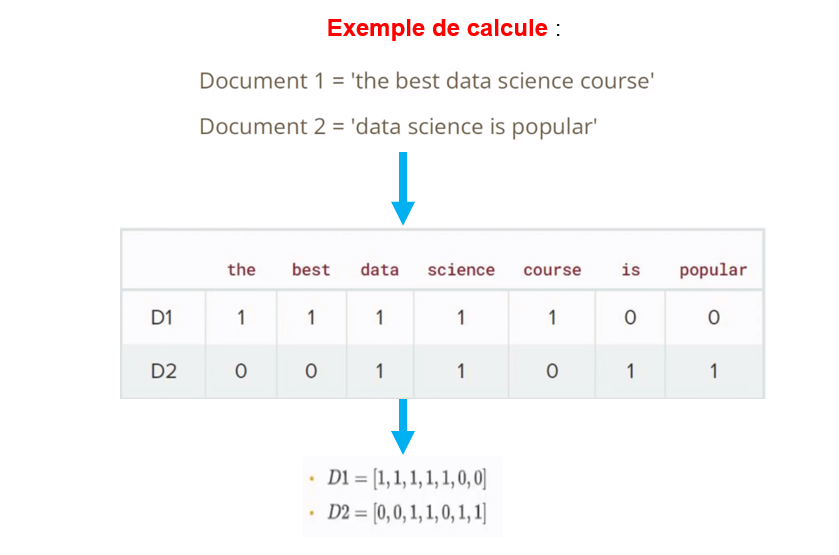

In [19]:
from IPython.display import display, Image

# Chemin de l'image
image_path = 'data/images/6.png'
# Afficher l'image
display(Image(filename=image_path))


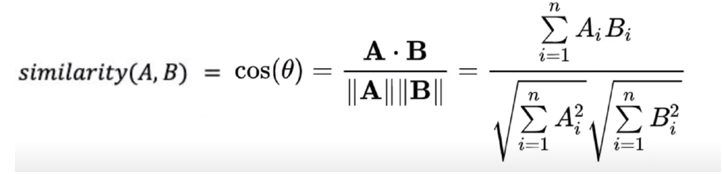

In [20]:
from IPython.display import display, Image

# Chemin de l'image
image_path = 'data/images/4.png'
# Afficher l'image
display(Image(filename=image_path))

<div style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333;">
On a deux Architecture pour Word2vec : 
<p style="color : red">Le modèle CBOW</p> (Continuous Bag of Words) prédit le mot central d'un contexte donné, tandis que 
<p style="color : red">le modèle Skip Gram</p> prédit les mots de contexte à partir d'un mot central donné. SkipGram est plus adapté pour les mots fréquents et rares et permet de capturer les associations sémantiques entre les mots adjacents en utilisant une fenêtre de contexte

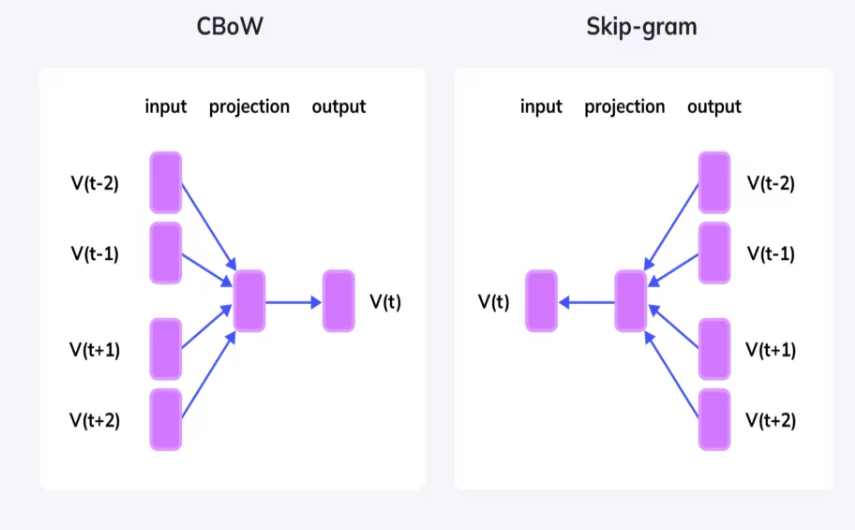

In [21]:
from IPython.display import display, Image

# Chemin de l'image
image_path = 'data/images/19.png'
# Afficher l'image
display(Image(filename=image_path))


# <span style="color: blue; font-family: Arial; font-size: 24px; text-align: center;">Problèmes :</span>

In [22]:
cv_text = """
John Doe
123 Main Street, Anytown, USA
Phone: (555) 123-4567
Email: johndoe@email.com

Objective:
Experienced software engineer seeking challenging opportunities in the field of artificial intelligence.

Education:
Bachelor of Science in Computer Science
University of Example, Anytown, USA
Graduated: May 2010

Technical Skills:
Programming Languages: Python, Java, C++
Machine Learning: TensorFlow, Scikit-learn
Web Development: HTML, CSS, JavaScript
Database: SQL, MongoDB
Tools: Git, Docker, Jenkins

Experience:
Software Engineer
Tech Solutions Inc., Anytown, USA
January 2011 - Present
- Developed and maintained software applications using Python and Java.
- Implemented machine learning algorithms for data analysis.
- Collaborated with cross-functional teams to deliver high-quality software products.
"""

In [23]:
offer_text = """
Job Title: Data Scientist

Company Description: Our company is a global leader in information technology, providing innovative solutions across a wide range of sectors including healthcare, finance, e-commerce, and telecommunications. We are committed to using data to make a positive and meaningful impact worldwide.

Location: Paris, France (Remote work option available)

Responsibilities:

Design and implement machine learning models to solve complex business problems.
Analyze large datasets to identify trends, patterns, and actionable insights.
Develop robust data pipelines for data acquisition, cleaning, transformation, and visualization.
Collaborate with cross-functional teams to understand business needs and define data-driven solutions.
Perform rigorous model validation and optimize performance using advanced techniques.

Requirements:

Master's or Ph.D. degree in computer science, statistics, mathematics, or a related field.
Relevant professional experience as a data scientist, preferably in a product or technology services environment.
Strong programming skills in languages such as Python or R, with hands-on experience using libraries such as TensorFlow, PyTorch, Scikit-learn, and Pandas.
Proficiency in machine learning techniques including regression, classification, clustering, and reinforcement learning.
Excellent communication skills and ability to present complex findings in a clear and concise manner.

Benefits:

Competitive compensation and attractive benefits package.
Professional development opportunities and continuous training.
Stimulating and collaborative work environment with a culture focused on innovation.
Opportunity to work on cutting-edge projects with global impact.
Flexibility of remote work and schedules.
"""

In [24]:
# Entraînement du modèle Word2Vec
tokenized_sentences = [word_tokenize(sentence) for sentence in [cv_text, offer_text]]
model = Word2Vec(tokenized_sentences, vector_size=100, window=5, min_count=1, workers=2)
word_vectors = model.wv

In [25]:
# Calcul du vecteur moyen du CV
cv_tokens = word_tokenize(cv_text.lower())
cv_tokens = [token for token in cv_tokens if token not in string.punctuation and token not in stopwords.words('english')]
cv_vector = np.mean([word_vectors[token] for token in cv_tokens if token in word_vectors.key_to_index], axis=0)

In [26]:
# Calcul du vecteur moyen de l'offre d'emploi
offer_tokens = word_tokenize(offer_text.lower())
offer_tokens = [token for token in offer_tokens if token not in string.punctuation and token not in stopwords.words('english')]
offer_vector = np.mean([word_vectors[token] for token in offer_tokens if token in word_vectors.key_to_index], axis=0)

In [27]:
similarity_score = cosine_similarity([cv_vector], [offer_vector])[0][0]
print("Similarité cosinus entre le CV et l'offre d'emploi:", similarity_score)

Similarité cosinus entre le CV et l'offre d'emploi: 0.28564546


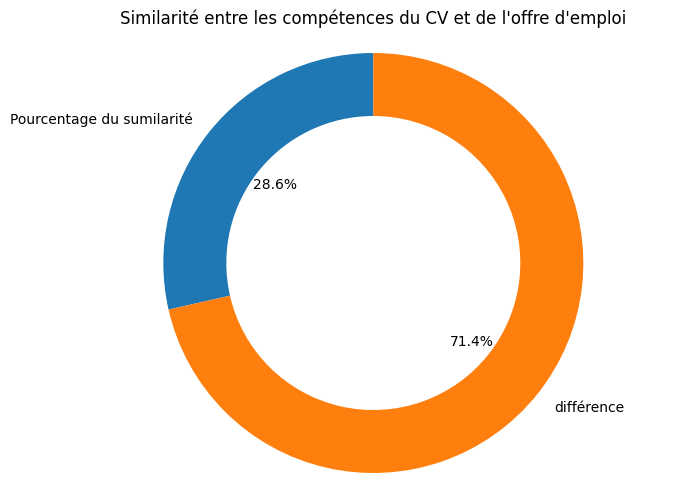

In [28]:
#Diagramme en secteurs (Donut Chart) :
import matplotlib.pyplot as plt

# Seuil de similarité
seuil = 0.7  # Par exemple, vous pouvez définir le seuil à 0.7

# Texte des étiquettes pour les compétences
labels = ['Pourcentage du sumilarité', 'différence']

# Valeur de similarité cosinus
values = [similarity_score, 1 - similarity_score]

# Créer le diagramme en secteurs avec un trou au centre (Donut Chart)
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.title('Similarité entre les compétences du CV et de l\'offre d\'emploi')
plt.annotate(f"", xy=(0, 0), xytext=(-1.5, -1.5), fontsize=12, color='red')
plt.axis('equal')  # Pour que le diagramme soit un cercle
plt.show()

# Entrainement du modél  NER avec spacy

<div style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333;">
Le NLP étudie la structure et les règles du langage et crée des systèmes  intelligents capables de dériver un sens du texte et de la parole parmi les technique de NLP  c’est la reconnaissance d’entités nommées (NER) – également appelée identification d’entité ou extraction d’entité – est une technique de traitement du langage naturel (NLP) qui identifie automatiquement les entités nommées dans un texte et les classe dans des catégories prédéfinies  .Les entités peuvent être des noms de personnes, d’organisations, de lieux, d’heures, de quantités, de valeurs monétaires, de pourcentages, etc.

In [29]:
import spacy

# Charger le modèle anglais "en_core_web_sm"
nlp = spacy.load("en_core_web_sm")

# Afficher les entités par défaut dans le pipeline NER
print("Entités par défaut dans le pipeline NER :")
for label in nlp.get_pipe("ner").labels:
    print("-", label)


C:\Users\tallo\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
C:\Users\tallo\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


Entités par défaut dans le pipeline NER :
- CARDINAL
- DATE
- EVENT
- FAC
- GPE
- LANGUAGE
- LAW
- LOC
- MONEY
- NORP
- ORDINAL
- ORG
- PERCENT
- PERSON
- PRODUCT
- QUANTITY
- TIME
- WORK_OF_ART


In [121]:
# Charger le modèle anglais "en_core_web_sm"
nlp = spacy.load("en_core_web_sm")

# Texte à traiter avec Python et Java
text = "Said Tallouk is a Python developer at Tech Maroc Corporation, while John Smith is a Java developer at Global Solutions Inc."

# Traiter le texte avec le modèle NER
doc = nlp(text)

# Définir les couleurs pour chaque type d'entité
colors = {"PERSON": "linear-gradient(90deg, #aa9cfc, #fc9ce7)",
          "ORG": "linear-gradient(90deg, #aa9cfc, #fc9ce7)",
          "DATE": "linear-gradient(90deg, #ff9999, #ff6666)",
          "EVENT": "linear-gradient(90deg, #ff9999, #ff6666)",
          "PRODUCT": "linear-gradient(90deg, #ff9999, #ff6666)"}

# Définir les types d'entités à afficher et les couleurs correspondantes
options = {"ents": ["PERSON", "ORG", "DATE", "EVENT", "PRODUCT"], "colors": colors}

# Afficher les entités avec les couleurs
displacy.render(doc, style="ent", options=options, jupyter=True)


In [31]:
from IPython.display import display, Image, HTML

# Chemin de l'image
image_path = 'data/images/12.png'

# Texte à afficher au-dessus de l'image
text_above_image = "Maintenant est-ce que ces entités sont suffisantes pour l'analyse des CV ?"

# Définir le style CSS pour le texte et l'image
text_style = "font-size: 18px; color: #333; font-weight: bold;"  # Style du texte
image_style = "display: block; margin: 0 auto; width: 15%;"  # Style de l'image (centrée)

# Balise HTML pour afficher le texte et l'image
html_code = f"""
<div style="text-align: center;">
    <p style="{text_style}">{text_above_image}</p>
    <img src="{image_path}" style="{image_style}">
</div>
"""

# Afficher le texte et l'image
display(HTML(html_code))


<div style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5; color: #333;">
Non n'est pas suffusament il faut entrainée un modél avec spacy  l'entraînement d'un modèle avec spaCy vise à adapter les fonctionnalités de traitement du langage naturel pour répondre à des besoins spécifiques et à améliorer les performances dans des domaines ou des cas d'utilisation particuliers.Notre besoin spécifique c'est l'entrainement d'un modél pour détecter justement les skills dans cv et l'offre d'emploi   

In [134]:
from IPython.display import display, HTML

# Chemin vers l'image que vous voulez afficher
chemin_image = "data/images/1000.png"

# Largeur et hauteur souhaitées
width = 800
height = 300

# Code HTML pour centrer l'image
html_code = f"""
<div style="text-align: center;">
    <img src="{chemin_image}" alt="Image" width="{width}" height="{height}">
</div>
"""

# Afficher l'image centrée
display(HTML(html_code))


In [32]:
# Charger les données annotées à partir du fichier JSON
with open("data/data.json", "r", encoding="utf-8") as file:
    data = json.load(file)
data

[{'text': 'John Doe', 'annotations': [{'start': 0, 'end': 8, 'label': 'PER'}]},
 {'text': 'Email: johndoe@email.com',
  'annotations': [{'start': 7, 'end': 24, 'label': 'EMAIL'}]},
 {'text': 'Data Scientist',
  'annotations': [{'start': 0, 'end': 14, 'label': 'JOB_TITLE'}]},
 {'text': 'Skills: Machine Learning, Python, R, Data Analysis, SQL',
  'annotations': [{'start': 8, 'end': 24, 'label': 'SKILL'},
   {'start': 26, 'end': 32, 'label': 'SKILL'},
   {'start': 34, 'end': 35, 'label': 'SKILL'},
   {'start': 37, 'end': 49, 'label': 'SKILL'},
   {'start': 51, 'end': 54, 'label': 'SKILL'}]},
 {'text': 'Experience: 3 years as a Data Scientist at XYZ Corp.',
  'annotations': [{'start': 12, 'end': 19, 'label': 'EXPERIENCE'},
   {'start': 23, 'end': 36, 'label': 'JOB_TITLE'},
   {'start': 40, 'end': 49, 'label': 'COMPANY'}]},
 {'text': "Education: Master's degree in Data Science from ABC University",
  'annotations': [{'start': 12, 'end': 21, 'label': 'EDUCATION'},
   {'start': 25, 'end': 36,

In [33]:
# Charger le modèle de langue englais de spaCy
nlp = spacy.blank("en")
# Ajouter un composant NER au pipeline
ner = nlp.add_pipe("ner")

# Préparer les exemples d'entraînement
train_data = []
for entry in data:
    text = entry["text"]
    entities = []
    for annotation in entry["annotations"]:
        start = annotation["start"]
        end = annotation["end"]
        label = annotation["label"]
        entities.append((start, end, label))
    train_data.append(Example.from_dict(nlp.make_doc(text), {"entities": entities}))

# Entraîner le modèle NER
optimizer = nlp.begin_training()
for itn in range(10):  # Nombre d'itérations d'entraînement
    random.shuffle(train_data)
    for batch in spacy.util.minibatch(train_data, size=2):
        nlp.update(batch, sgd=optimizer)

# Sauvegarder le modèle entraîné
nlp.to_disk("trained_ner_model")

C:\Users\tallo\AppData\Local\Programs\Python\Python312\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Skills: Machine Learning, Python, R, Data Analysis..." with entities "[(8, 24, 'SKILL'), (26, 32, 'SKILL'), (34, 35, 'SK...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\tallo\AppData\Local\Programs\Python\Python312\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Experience: 3 years as a Data Scientist at XYZ Cor..." with entities "[(12, 19, 'EXPERIENCE'), (23, 36, 'JOB_TITLE'), (4...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\tallo\AppData\Local\Programs\Python\Python312

<div style="text-align: justify; font-family: Arial, sans-serif; font-size: 16px; line-height: 1.6;">
    
 La descente de gradient (gradient descent en anglais) est un algorithme d'optimisation utilisé pour minimiser une fonction en ajustant itérativement ses paramètres. C'est l'un des algorithmes les plus couramment utilisés dans l'apprentissage automatique et l'optimisation numérique.
</div>


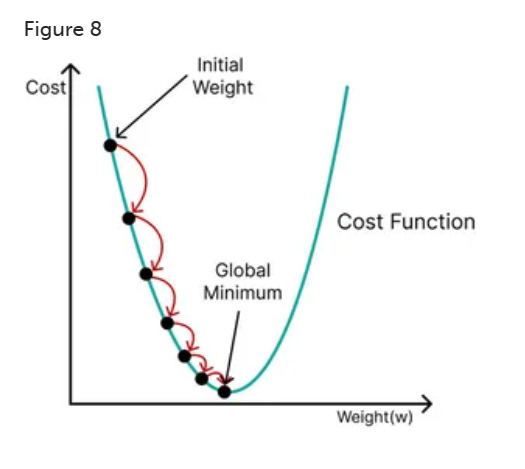

In [117]:
from IPython.display import display, Image

# Chemin vers l'image que vous voulez afficher
chemin_image = "data/images/1.png"

# Afficher l'image
display(Image(filename=chemin_image))

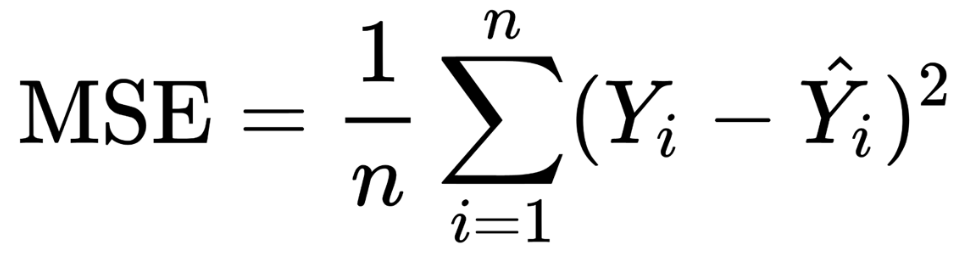

In [119]:

from IPython.display import display, Image

# Chemin vers l'image que vous voulez afficher
chemin_image = "data/images/2.png"

# Afficher l'image
display(Image(filename=chemin_image))

<span style="color: blue; font-family: Arial; font-size: 24px; text-align: center;">lire  PDF :</span>

In [34]:
from PyPDF2 import PdfReader

def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, 'rb') as file:
        reader = PdfReader(file)
        num_pages = len(reader.pages)    
        for page_num in range(num_pages):
            page = reader.pages[page_num]
            text += page.extract_text()
    return text

<span style="color: blue; font-family: Arial; font-size: 24px; text-align: center;">Des cv pour data science</span>

In [35]:
cv_pdf_path = "data/CV/datascience.pdf"
cv_text = extract_text_from_pdf(cv_pdf_path)

In [36]:
import spacy
from spacy import displacy

# Charger le modèle NER entraîné
nlp = spacy.load("trained_ner_model")

# Traiter le texte avec le modèle NER
doc = nlp(cv_text)

# Personnaliser les options de visualisation pour mettre en évidence les compétences en bleu
options = {"ents": ["SKILL"], "colors": {"SKILL": "#ACI34r"}}  # Utilisation de la couleur bleu foncé

# Afficher le texte avec les entités mises en évidence selon les options personnalisées
displacy.render(doc, style="ent", jupyter=True, options=options)

In [37]:
import spacy
from spacy import displacy

# Charger le modèle NER entraîné
nlp = spacy.load("trained_ner_model")

# Traitement du texte du CV PDF avec le modèle NER
doc = nlp(cv_text)

# Filtrer les entités de type "SKILL" (compétences)
skills = [ent.text for ent in doc.ents if ent.label_ == "SKILL"]

# Afficher les compétences extraites
print("Compétences extraites du CV :")
for skill in skills:
    print("-", skill)

Compétences extraites du CV :
- johndoe@email.com  
(555)
- Python
- R
- SQL  

- TensorFlow,
- PyTorch, Scikit -learn
- Pandas,
- NumPy
- Matplotlib,
- Machine Learning
- Deep Learning
- Vision
- Data Analysis
- Data Visualization
- Networks (CNN)
- Pandas
- Matplotlib,


In [38]:
cv_pdf_path = "data/CV/anass.pdf"

# Extraction du texte du CV PDF
cv_text = extract_text_from_pdf(cv_pdf_path)

In [39]:
import spacy
from spacy import displacy

# Charger le modèle NER entraîné
nlp = spacy.load("trained_ner_model")

# Traiter le texte avec le modèle NER
doc = nlp(cv_text)

# Personnaliser les options de visualisation pour mettre en évidence les compétences en bleu
options = {"ents": ["SKILL"], "colors": {"SKILL": "#ACI34r"}}  # Utilisation de la couleur bleu foncé

# Afficher le texte avec les entités mises en évidence selon les options personnalisées
displacy.render(doc, style="ent", jupyter=True, options=options)

In [40]:
import spacy
from spacy import displacy

# Charger le modèle NER entraîné
nlp = spacy.load("trained_ner_model")

# Traitement du texte du CV PDF avec le modèle NER
doc = nlp(cv_text)

# Filtrer les entités de type "SKILL" (compétences)
skills = [ent.text for ent in doc.ents if ent.label_ == "SKILL"]

# Afficher les compétences extraites
print("Compétences extraites du CV :")
for skill in skills:
    print("-", skill)


Compétences extraites du CV :
- C++ ,
- JAVA ,
- PL/SQL
- JAVASCRIPT,
- Bootstrap
- Tailwind

- CSS ,
- JEE

- React JS
- Advancedlinkedin.com/in/anassnabil
- Postman ,
- React Native
- React Native
- Javascript and
- javascript,
- HTML
- CSS, JS,
- CSS, JS,
- BOOTSTRAP,
- PHP, LARAVEL)VOLUNTEER


In [41]:
import spacy
from spacy import displacy
cv_pdf_path = "data/CV/nassim.pdf"

# Extraction du texte du CV PDF
cv_text = extract_text_from_pdf(cv_pdf_path)
# Charger le modèle NER entraîné
nlp = spacy.load("trained_ner_model")

# Traiter le texte avec le modèle NER
doc = nlp(cv_text)

# Personnaliser les options de visualisation pour mettre en évidence les compétences en bleu
options = {"ents": ["SKILL"], "colors": {"SKILL": "#ACI34r"}}  # Utilisation de la couleur bleu foncé

# Afficher le texte avec les entités mises en évidence selon les options personnalisées
displacy.render(doc, style="ent", jupyter=True, options=options)

In [42]:
import spacy
from spacy import displacy

# Charger le modèle NER entraîné
nlp = spacy.load("trained_ner_model")

# Traitement du texte du CV PDF avec le modèle NER
doc = nlp(cv_text)

# Filtrer les entités de type "SKILL" (compétences)
skills = [ent.text for ent in doc.ents if ent.label_ == "SKILL"]

# Afficher les compétences extraites
print("Compétences extraites du CV :")
for skill in skills:
    print("-", skill)


Compétences extraites du CV :
- Nassim Ait
- Python
- R
- PHP ,
- Pandas
- Numpy
- Scikit -learn
- React JS
- Power BI
- Matplotlib,
- Processing,
- Preparation, Transformation
- Numpy
- Matplotlib,
- Laravel,
- PHP ,
- Bootstrap
- Mailgun,
- PHP , Html
- JavaScript,
- Css,
- Bootstrap
- MySQL  
 

- Music,
- Intermediate  
French
- Intermediate  
Arabic
- Marrakech,


<span style="color: blue; font-family: Arial; font-size: 24px; text-align: center;">Cv pour Mobile</span>

In [43]:
import spacy
from spacy import displacy
cv_pdf_path = "data/CV/mobile.pdf"

# Extraction du texte du CV PDF
cv_text = extract_text_from_pdf(cv_pdf_path)
# Charger le modèle NER entraîné
nlp = spacy.load("trained_ner_model")

# Traiter le texte avec le modèle NER
doc = nlp(cv_text)

# Personnaliser les options de visualisation pour mettre en évidence les compétences en bleu
options = {"ents": ["SKILL"], "colors": {"SKILL": "#ACI34r"}}  # Utilisation de la couleur bleu foncé

# Afficher le texte avec les entités mises en évidence selon les options personnalisées
displacy.render(doc, style="ent", jupyter=True, options=options)

In [44]:
import spacy
from spacy import displacy

# Charger le modèle NER entraîné
nlp = spacy.load("trained_ner_model")

# Traitement du texte du CV PDF avec le modèle NER
doc = nlp(cv_text)

# Filtrer les entités de type "SKILL" (compétences)
skills = [ent.text for ent in doc.ents if ent.label_ == "SKILL"]

# Afficher les compétences extraites
print("Compétences extraites du CV :")
for skill in skills:
    print("-", skill)

Compétences extraites du CV :
- Java
- JavaScript  

- Android SDK
- iOS SDK
- React Native
- Android Studio
- SQLite
- Realm,
- Repository  

- Certificate,
- Traveling and Exploring


<span style="color: blue; font-family: Arial; font-size: 24px; text-align: center;">Cv pour RH</span>

In [45]:
import spacy
from spacy import displacy
cv_pdf_path = "data/CV/HR1.pdf"

# Extraction du texte du CV PDF
cv_text = extract_text_from_pdf(cv_pdf_path)
# Charger le modèle NER entraîné
nlp = spacy.load("trained_ner_model")

# Traiter le texte avec le modèle NER
doc = nlp(cv_text)

# Personnaliser les options de visualisation pour mettre en évidence les compétences en bleu
options = {"ents": ["SKILL"], "colors": {"SKILL": "#ACI34r"}}  # Utilisation de la couleur bleu foncé

# Afficher le texte avec les entités mises en évidence selon les options personnalisées
displacy.render(doc, style="ent", jupyter=True, options=options)

In [46]:
import spacy
from spacy import displacy

# Charger le modèle NER entraîné
nlp = spacy.load("trained_ner_model")

# Traitement du texte du CV PDF avec le modèle NER
doc = nlp(cv_text)

# Filtrer les entités de type "SKILL" (compétences)
skills = [ent.text for ent in doc.ents if ent.label_ == "SKILL"]

# Afficher les compétences extraites
print("Compétences extraites du CV :")
for skill in skills:
    print("-", skill)


Compétences extraites du CV :
- Recruitment and Selection
- Performance Management
- Relations and
- Training and Development
- Data Analysis and Reporting
- Resources (PHR
- , HR Certification Institute
- ), 2015
- Intermediate Proficiency


<span style="color: blue; font-family: Arial; font-size: 24px; text-align: center;">Offre d'emploi</span>

In [47]:
import spacy
from spacy import displacy
offre_pdf_path = "data/CV/offre data.pdf"

# Extraction du texte du CV PDF
offre_text = extract_text_from_pdf(offre_pdf_path)
# Charger le modèle NER entraîné
nlp = spacy.load("trained_ner_model")

# Traiter le texte avec le modèle NER
doc = nlp(offre_text)

# Personnaliser les options de visualisation pour mettre en évidence les compétences en bleu
options = {"ents": ["SKILL"], "colors": {"SKILL": "#ACI34r"}}  # Utilisation de la couleur bleu foncé

# Afficher le texte avec les entités mises en évidence selon les options personnalisées
displacy.render(doc, style="ent", jupyter=True, options=options)

In [48]:
import spacy
from spacy import displacy

# Charger le modèle NER entraîné
nlp = spacy.load("trained_ner_model")

# Traitement du texte du CV PDF avec le modèle NER
doc = nlp(offre_text)

# Filtrer les entités de type "SKILL" (compétences)
skills = [ent.text for ent in doc.ents if ent.label_ == "SKILL"]

# Afficher les compétences extraites
print("Compétences extraites du CV :")
for skill in skills:
    print("-", skill)


Compétences extraites du CV :
- Python
- R
- Python
- R
- SQL,
- Java
- Data Analysis and Visualization
- Pandas
- NumPy
- Matplotlib,
- Plotly,
- ggplot2,
- Machine Learning
- Scikit -learn
- TensorFlow,
- Random Forests
- Regression Analysis
- Hadoop
- Spark
- Apache Kafka
- Dimensionality Reduction
- Sentiment Analysis
- Data Warehousing
- Development,
- MySQL,
- ), Microsoft Azure
- Docker
- BeautifulSoup,
- Calculus,
- Finance,
- Sentiment Analysis of Customer


In [49]:
import spacy
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Fonction pour extraire les compétences à partir du texte avec un modèle NER
def extract_skills(text):
    nlp = spacy.load("trained_ner_model")  # Charger le modèle NER entraîné
    doc = nlp(text)
    skills = [ent.text for ent in doc.ents if ent.label_ == "SKILL"]  # Filtrer les entités de type "SKILL"
    return skills

# Fonction pour calculer la similarité entre deux ensembles de compétences
def calculate_similarity(cv_skills, offre_skills, word_vectors):
    # Filtrer les compétences qui ont des vecteurs de mots disponibles
    cv_skills_filtered = [skill for skill in cv_skills if skill in word_vectors.key_to_index]
    offre_skills_filtered = [skill for skill in offre_skills if skill in word_vectors.key_to_index]

    # Calculer les vecteurs de compétences moyens
    cv_vector = np.mean([word_vectors.get_vector(skill) for skill in cv_skills_filtered], axis=0)
    offre_vector = np.mean([word_vectors.get_vector(skill) for skill in offre_skills_filtered], axis=0)

    # Calculer la similarité cosinus entre les vecteurs de compétences
    if np.all(cv_vector) and np.all(offre_vector):
        similarity_score = cosine_similarity([cv_vector], [offre_vector])[0][0]
    else:
        similarity_score = None
    
    return similarity_score

# Texte brut de l'offre d'emploi et du CV
offre_pdf_path = "data/CV/offre data.pdf"
offre_text = extract_text_from_pdf(offre_pdf_path)
cv_pdf_path = "data/CV/nassim.pdf"
cv_text = extract_text_from_pdf(cv_pdf_path)

# Extraction des compétences de l'offre d'emploi et du CV
offre_skills = extract_skills(offre_text)
cv_skills = extract_skills(cv_text)

# Calcul de la similarité entre les compétences du CV et de l'offre d'emploi
similarity_score = calculate_similarity(cv_skills, offre_skills, word_vectors)
print("Similarité moyenne entre les compétences du CV et de l'offre d'emploi:", similarity_score)


Similarité moyenne entre les compétences du CV et de l'offre d'emploi: 0.8380058


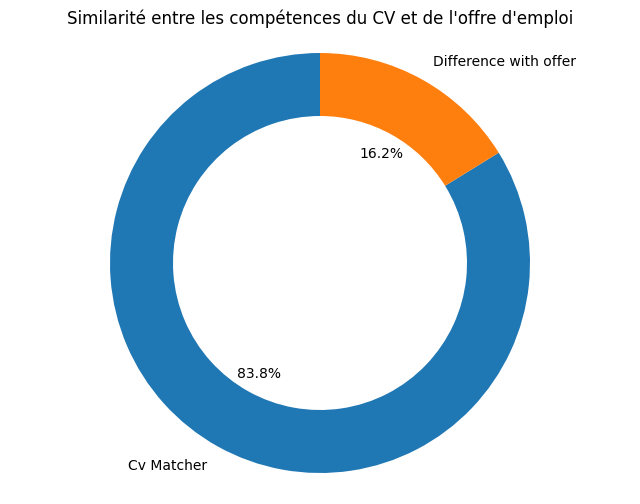

In [62]:
#Diagramme en secteurs (Donut Chart) :
import matplotlib.pyplot as plt

# Seuil de similarité
seuil = 0.7  # Par exemple, vous pouvez définir le seuil à 0.7

# Texte des étiquettes pour les compétences
labels = ['Cv Matcher', 'Difference with offer']

# Valeur de similarité cosinus
values = [similarity_score, 1 - similarity_score]

# Créer le diagramme en secteurs avec un trou au centre (Donut Chart)
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.title('Similarité entre les compétences du CV et de l\'offre d\'emploi')
plt.annotate(f"", xy=(0, 0), xytext=(-1.5, -1.5), fontsize=12, color='red')
plt.axis('equal')  # Pour que le diagramme soit un cercle
plt.show()

<span style="color: blue; font-family: Arial; font-size: 24px; text-align: center;">Algorithme Knn(K-Nearest Neighbors)</span>

KNN (K-Nearest Neighbors) est un algorithme d'apprentissage supervisé utilisé pour la classification et la régression

In [136]:
from IPython.display import display, HTML

# Chemin vers l'image que vous voulez afficher
chemin_image = "data/images/y.png"

# Largeur et hauteur souhaitées
width = 800
height = 300

# Code HTML pour centrer l'image
html_code = f"""
<div style="text-align: center;">
    <img src="{chemin_image}" alt="Image" width="{width}" height="{height}">
</div>
"""

# Afficher l'image centrée
display(HTML(html_code))

In [78]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Fonction pour extraire les compétences à partir du texte avec un modèle NER
def extract_skills(text):
    return [token.lower() for token in word_tokenize(text) if token.isalnum()]
    

# Fonction pour calculer la similarité entre deux ensembles de compétences
def calculate_similarity(cv_skills, offre_skills, word_vectors):
    cv_skills_filtered = [skill for skill in cv_skills if skill in word_vectors.key_to_index]
    offre_skills_filtered = [skill for skill in offre_skills if skill in word_vectors.key_to_index]

    cv_vector = np.mean([word_vectors.get_vector(skill) for skill in cv_skills_filtered], axis=0)
    offre_vector = np.mean([word_vectors.get_vector(skill) for skill in offre_skills_filtered], axis=0)

    if np.all(cv_vector) and np.all(offre_vector):
        similarity_score = cosine_similarity([cv_vector], [offre_vector])[0][0]
    else:
        similarity_score = None
    
    return similarity_score

# Exemple de compétences extraites de l'offre d'emploi et des CV
offre_skills = ["python", "machine", "learning", "communication"]
cv_texts = [
    #cv1 :
    "Nassim Ait Ouchrif\nCompétences :\n- Python\n- Analyse de données\n- Machine learning\n- Communication",
    #cv2 :
    "Alice Dupont\nCompétences :\n- Java\n- SQL\n- Développement web\n- Résolution de problèmes",
    #cv3 :
    "John Doe\nCompétences :\n- Python\n- Data Science\n- Communication\n- Machine Learning",
    #cv4 :
    "Jane Smith\nCompétences :\n- Python\n- Machine Learning\n- Data Analysis\n- SQL"
]

# Initialiser le modèle Word2Vec et les vecteurs de mots
tokenized_sentences = [word_tokenize(sentence) for sentence in cv_texts]
model = Word2Vec(tokenized_sentences, vector_size=100, window=5, min_count=1, workers=2)
word_vectors = model.wv

# Calculer les similarités entre les CV et l'offre d'emploi
similarity_scores = []
for cv_text in cv_texts:
    cv_skills = extract_skills(cv_text)
    similarity_score = calculate_similarity(cv_skills, offre_skills, word_vectors)
    similarity_scores.append(similarity_score)

# Utiliser l'algorithme KNN pour classer les CV en fonction de leur similarité avec l'offre d'emploi
nbrs = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(np.array(similarity_scores).reshape(-1, 1))
nearest_indices = nbrs.kneighbors([[1]])[1]

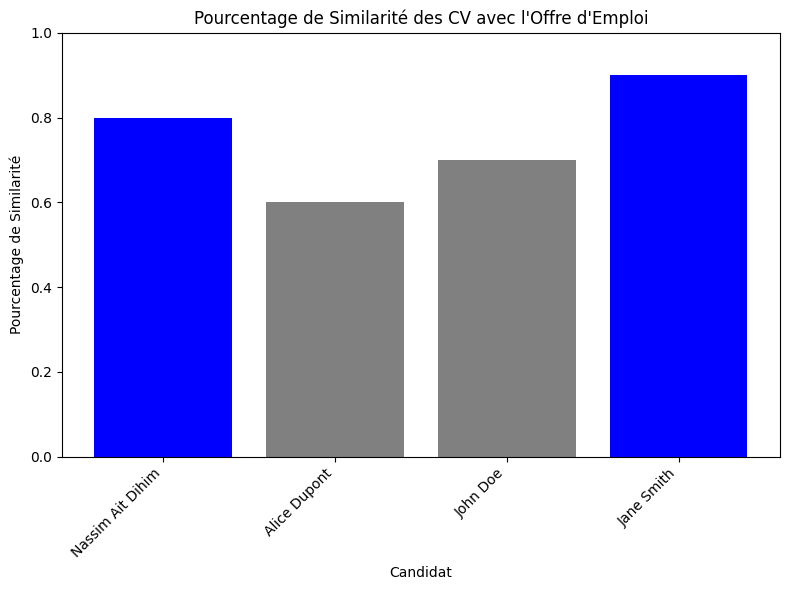

In [116]:
import spacy
from spacy import displacy
from PyPDF2 import PdfReader
import matplotlib.pyplot as plt

# Fonction pour extraire les compétences à partir du texte avec un modèle NER
def extract_skills_from_cv(cv_text):
    # Charger le modèle NER entraîné
    nlp = spacy.load("trained_ner_model")
    # Traitement du texte du CV PDF avec le modèle NER
    doc = nlp(cv_text)
    # Filtrer les entités de type "SKILL" (compétences)
    skills = [ent.text for ent in doc.ents if ent.label_ == "SKILL"]
    return skills

# Fonction pour extraire le texte à partir d'un fichier PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, 'rb') as file:
        reader = PdfReader(file)
        num_pages = len(reader.pages)
        for page_num in range(num_pages):
            page = reader.pages[page_num]
            text += page.extract_text()
    return text

# Fonction pour calculer la similarité entre deux ensembles de compétences
def calculate_similarity(cv_skills, offre_skills):
    # Convertir les compétences en ensembles pour faciliter la comparaison
    cv_skills_set = set(cv_skills)
    offre_skills_set = set(offre_skills)
    # Calculer le nombre de compétences communes
    common_skills_count = len(cv_skills_set.intersection(offre_skills_set))
    # Calculer la similarité comme le rapport du nombre de compétences communes au nombre total de compétences dans l'offre d'emploi
    similarity_score = common_skills_count / len(offre_skills_set)
    return similarity_score

# Fonction pour afficher le diagramme
def plot_similarity(cv_names, similarity_scores, selected_cv_indices):
    # Labels des CV
    labels = cv_names

    # Couleurs pour les CV sélectionnés
    colors = ['blue' if i in selected_cv_indices else 'gray' for i in range(len(similarity_scores))]

    # Création du diagramme
    plt.figure(figsize=(8, 6))
    plt.bar(labels, similarity_scores, color=colors)
    plt.title('Pourcentage de Similarité des CV avec l\'Offre d\'Emploi')
    plt.xlabel('Candidat')
    plt.ylabel('Pourcentage de Similarité')
    plt.ylim(0, 1)  # Assure que l'échelle de l'axe y va de 0 à 1
    plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes sur l'axe x pour une meilleure lisibilité
    plt.tight_layout()  # Ajustement automatique du diagramme pour éviter le chevauchement des étiquettes
    plt.show()

# Exemple de noms de candidats et de pourcentages de similarité
cv_names = ["Nassim Ait Dihim", "Alice Dupont", "John Doe", "Jane Smith"]
similarity_scores = [0.8, 0.6, 0.7, 0.9]  # Par exemple
selected_cv_indices = [3, 0]  # Indices des CV sélectionnés

# Affichage du diagramme
plot_similarity(cv_names, similarity_scores, selected_cv_indices)


In [51]:
# tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
# model = Word2Vec(tokenized_sentences, vector_size=100, window=5, min_count=1, workers=2)
# word_vectors = model.wv

In [101]:
import joblib

# Sauvegarder le modèle SpaCy
joblib.dump(model, "modele_spacy_cv.joblib")

['modele_spacy_cv.joblib']